In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading data

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1105s 6us/step


In [14]:
train_images = train_images / 127.5 - 1
test_images = test_images / 127.5 - 1

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [16]:
print("Number of images in the training dataset: ",train_images.shape) 
print("Number of images in the training dataset: ",test_images.shape) 

Number of images in the training dataset:  (50000, 32, 32, 3)
Number of images in the training dataset:  (10000, 32, 32, 3)


In [18]:
print("Number of images in the training dataset: ",train_images[0].shape) 

Number of images in the training dataset:  (32, 32, 3)


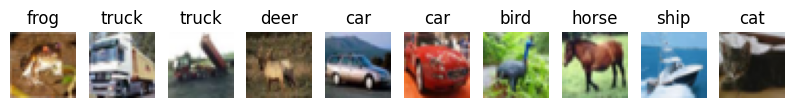

In [22]:
fig, axes = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    image = train_images[i]
    denormalized_image = (image + 1)/2
    axes[i].imshow(denormalized_image)
    axes[i].set_title(classes[train_labels[i][0]])
    axes[i].axis('off')

In [32]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2), strides=(2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         553,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 639,742 (2.44 MB)

 Trainable params: 639,742 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.4426 - loss: 1.5428 - val_accuracy: 0.6478 - val_loss: 1.0138
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6748 - loss: 0.9400 - val_accuracy: 0.6855 - val_loss: 0.9001
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7393 - loss: 0.7485 - val_accuracy: 0.7119 - val_loss: 0.8467
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7882 - loss: 0.6132 - val_accuracy: 0.7243 - val_loss: 0.8216
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8255 - loss: 0.4964 - val_accuracy: 0.7144 - val_loss: 0.8710
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8625 - loss: 0.3952 - val_accuracy: 0.7238 - val_loss: 0.9116
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8924 - loss: 0.3133 - val_accuracy: 0.7264 - val_loss: 0.9895
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.9169 -

In [50]:
def view_classification(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    denormalized_image = (image + 1)/2
    ax1.imshow(denormalized_image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


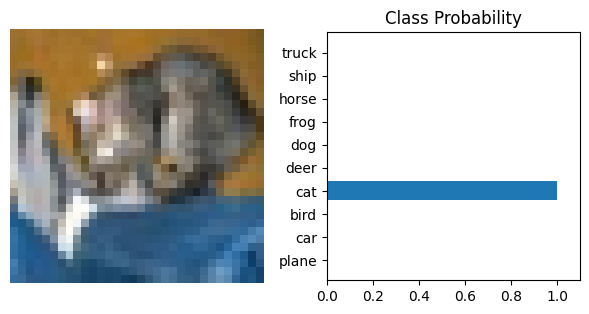

In [52]:
index=0
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1,32,32,3))
view_classification(image, probabilities[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


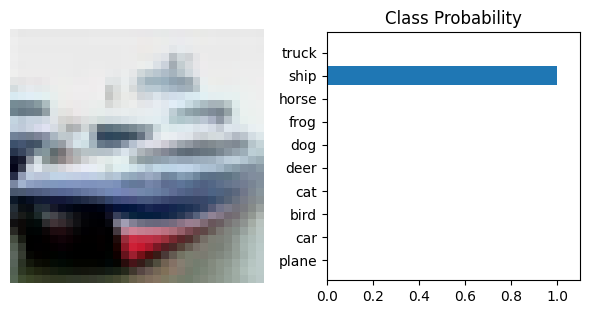

In [54]:
index=1
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1,32,32,3))
view_classification(image, probabilities[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


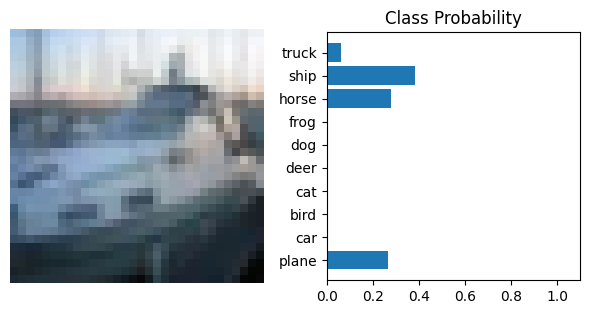

In [56]:
index=2
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1,32,32,3))
view_classification(image, probabilities[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


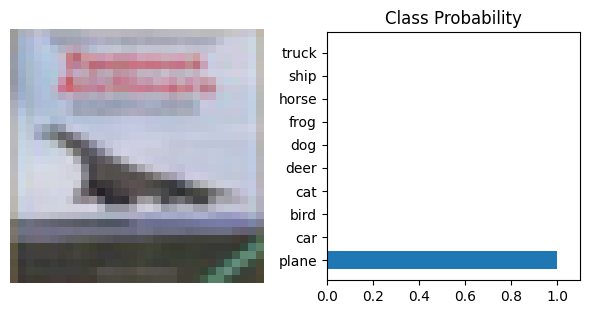

In [58]:
index=3
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1,32,32,3))
view_classification(image, probabilities[0])

In [68]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7164 - loss: 1.3599
Accuracy of the neural network on the 10000 test images: 71.19%
